In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME']="raninaattef"
os.environ['KAGGLE_KEY']="a269bf45e22b6bed87e181047763d366"
!kaggle competitions download -c dogs-vs-cats #copy api

100% 811M/812M [00:12<00:00, 69.4MB/s]
100% 812M/812M [00:12<00:00, 66.8MB/s]


In [ ]:
!ls

 dogs-vs-cats-keras-solution.ipynb  'MSR-LA - 3467.docx'
 dogs-vs-cats.zip		     PetImages
 imdb-reviews-dataset.zip	    'readme[1].txt'
 microsoft-catsvsdogs-dataset.zip    sample_data


In [ ]:
!unzip /content/dogs-vs-cats.zip

Archive:  /content/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [ ]:
!unzip /content/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [ ]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

dog


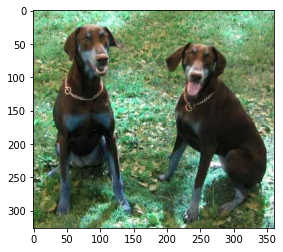

In [ ]:

train_dir = "/content/train"
path = os.path.join(train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    print(category)
    img_array = cv2.imread(os.path.join(path,p))
    plt.imshow(img_array)
    break

In [ ]:
classes = []

for p in os.listdir(path):
    category = p.split(".")[0]
    if category =='dog':
        classes.append(1)
    else:
        classes.append(0)

In [ ]:
file_names = os.listdir(path)

In [ ]:
df = pd.DataFrame({
    'filename': file_names,
    'class': classes
})
df

,filename,class
0,dog.11423.jpg,1
1,dog.6971.jpg,1
2,dog.5057.jpg,1
3,dog.4986.jpg,1
4,cat.6639.jpg,0
...,...,...
24995,dog.12243.jpg,1
24996,cat.9306.jpg,0
24997,dog.10955.jpg,1
24998,dog.10383.jpg,1


<AxesSubplot:>

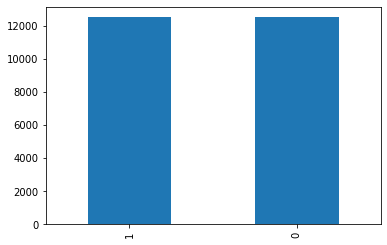

In [ ]:
df['class'].value_counts().plot.bar()

In [ ]:
df.filename[1]

'dog.6971.jpg'

(326, 361, 3)


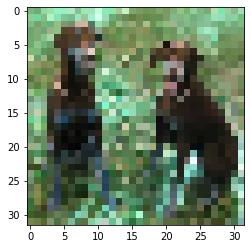

In [ ]:
img=(cv2.imread(os.path.join(path,df.filename[0])))
print(img.shape)
plt.imshow(cv2.resize(img, (32,32)))

In [ ]:
#convert the image to vector
def image_to_feature_vector(image, size=(32, 32)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [ ]:
#Extract the features
def extract_color_histogram(image, bins=(8, 8, 8)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])
	# handle normalizing the histogram if we are using OpenCV 2.4.X
	if imutils.is_cv2():
		hist = cv2.normalize(hist)
	# otherwise, perform "in place" normalization in OpenCV 3 (I
	# personally hate the way this is done
	else:
		cv2.normalize(hist, hist)
	# return the flattened histogram as the feature vector
	return hist.flatten()

In [ ]:
rawImages = []
features = []
labels = []

In [ ]:
for i in range(len(df)):
    img=(cv2.imread(os.path.join(path,df.filename[i])))
    pixels = image_to_feature_vector(img)
    hist = extract_color_histogram(img)
    rawImages.append(pixels)
    features.append(hist)
    labels.append(df['class'].loc[i])

In [ ]:
rawImages = np.array(rawImages)
features = np.array(features)
labels = np.array(labels)
print("[INFO] pixels matrix: {:.2f}MB".format(
	rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(
	features.nbytes / (1024 * 1000.0)))

[INFO] pixels matrix: 75.00MB
[INFO] features matrix: 50.00MB


In [ ]:
trainRI, testRI, trainRL, testRL= train_test_split(
	rawImages, labels, test_size=0.2, random_state=42)

trainFeat, testFeat, trainLabels, testLabels = train_test_split(
	features, labels, test_size=0.2, random_state=42)

In [ ]:
model_Raw_image = KNeighborsClassifier(n_neighbors=5,
	n_jobs=-1)
model_Raw_image.fit(trainRI, trainRL)
acc = model_Raw_image.score(testRI, testRL)
print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100))

[INFO] raw pixel accuracy: 56.64%


In [ ]:
k=50
model_Features = KNeighborsClassifier(n_neighbors=k,
	n_jobs=-1)
model_Features.fit(trainFeat, trainLabels)
acc = model_Features.score(testFeat, testLabels)
print("[INFO] histogram accuracy: {:.2f}%".format(acc * 100))

[INFO] histogram accuracy: 62.36%
